In [1]:
import pandas as pd
import numpy as np
import warnings

In [2]:
# for visualizaion
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import warnings
colors = sns.color_palette("Set2")
warnings.filterwarnings('ignore')
# for model selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [3]:
car =pd.read_csv('/content/car data.csv')
car


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
car.shape

(301, 9)

In [5]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [8]:
#always check duplicte values
car.duplicated().sum()

2

In [9]:
car.drop_duplicates(inplace = True)

In [10]:
car.duplicated().sum()

0

In [11]:
#check new shape of dataframe
car.shape

(299, 9)

**EDA**

**Correlation Heatmap**

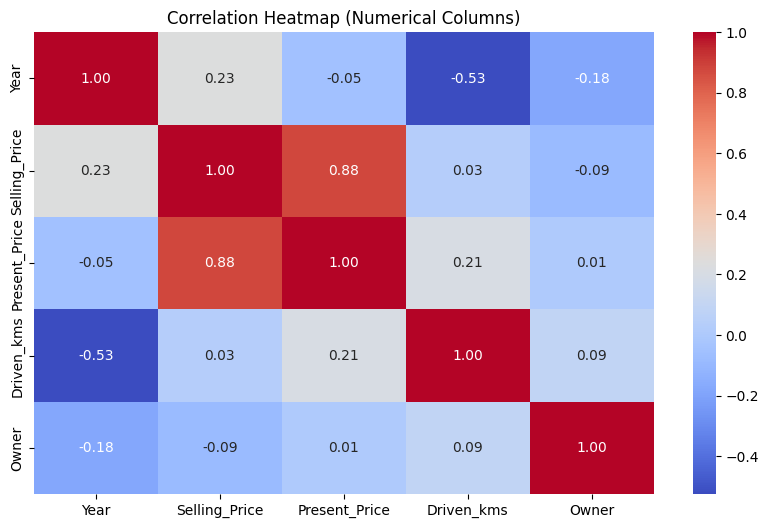

In [12]:
#select num columns
num_col = car.select_dtypes(include=['number']).columns

#creating dataframe contains only numerical columns
num_car = car[num_col]

#creating heatmap
correlation_matrix = num_car.corr()
plt.figure(figsize =(10,6))
sns.heatmap(correlation_matrix,annot = True,cmap ='coolwarm',fmt =".2f")
plt.title('Correlation Heatmap (Numerical Columns)')
plt.show()

**Check for outliers**

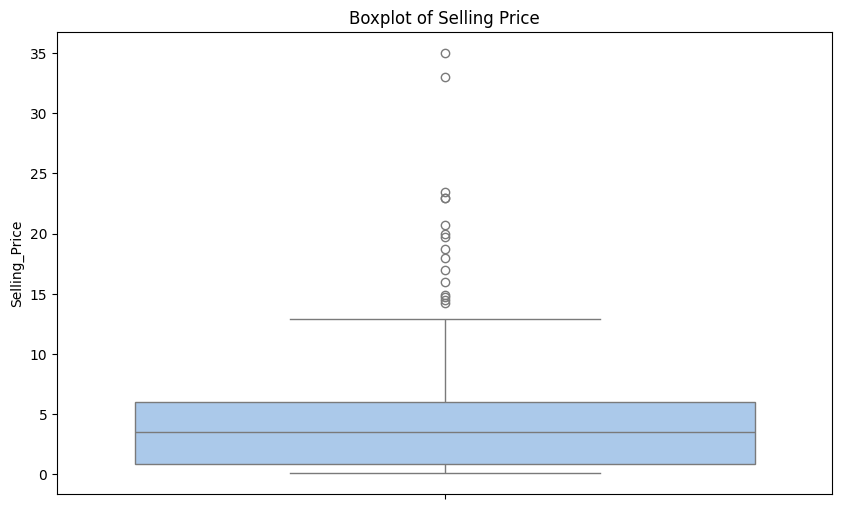

In [13]:
#check for outlier
plt.figure(figsize=(10,6))
sns.boxplot(car['Selling_Price'], palette ='pastel')
plt.title('Boxplot of Selling Price')
plt.show()

**Distribution of Numerical Features**

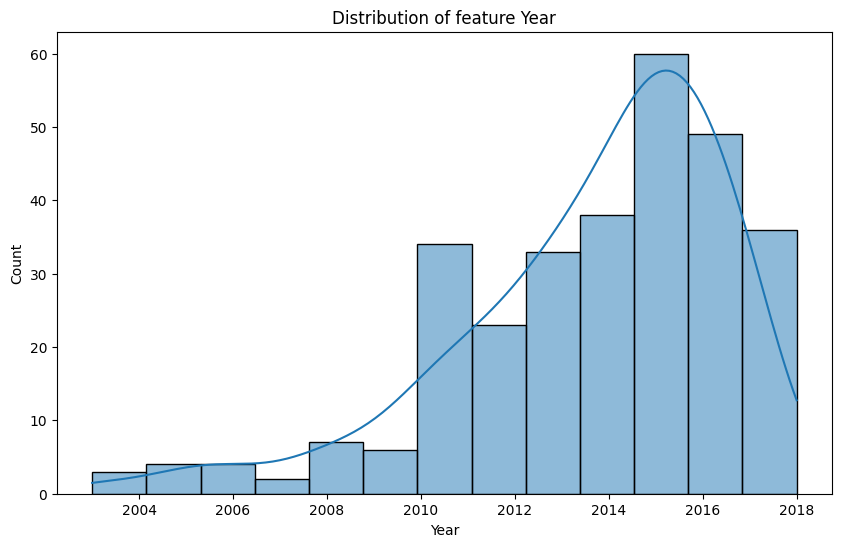

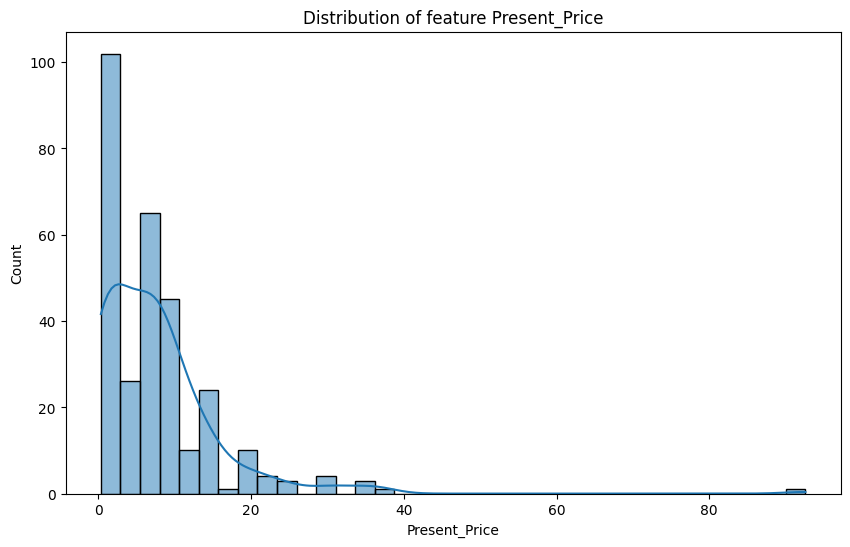

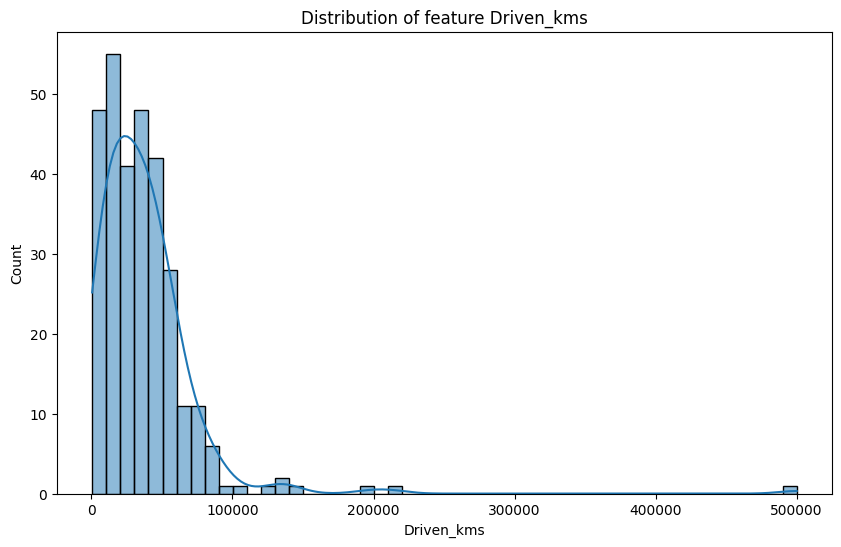

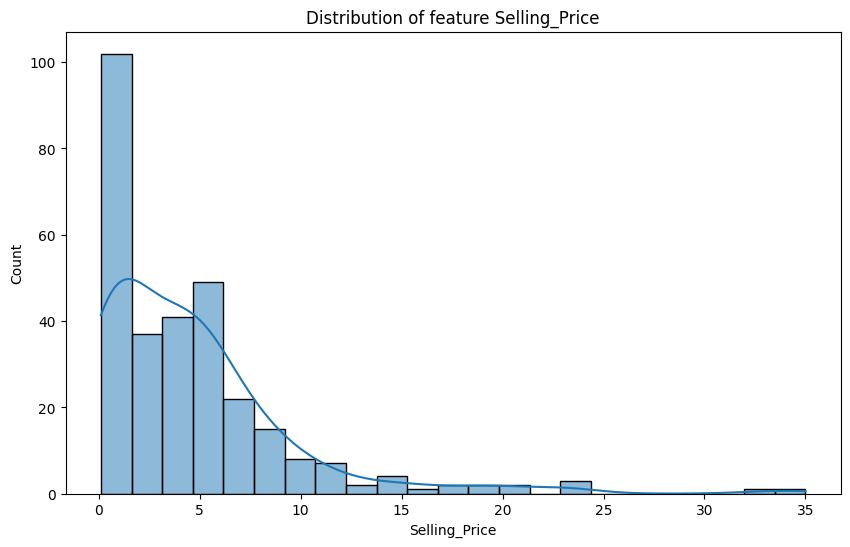

In [14]:
numerical_features = ['Year','Present_Price','Driven_kms','Selling_Price']
for feature in numerical_features:
     plt.figure(figsize=(10,6))
     sns.histplot(data =car,x =feature, kde =True)
     plt.title(f'Distribution of feature {feature}')
     plt.show()


**Scatterplot for driven kms and selling price**

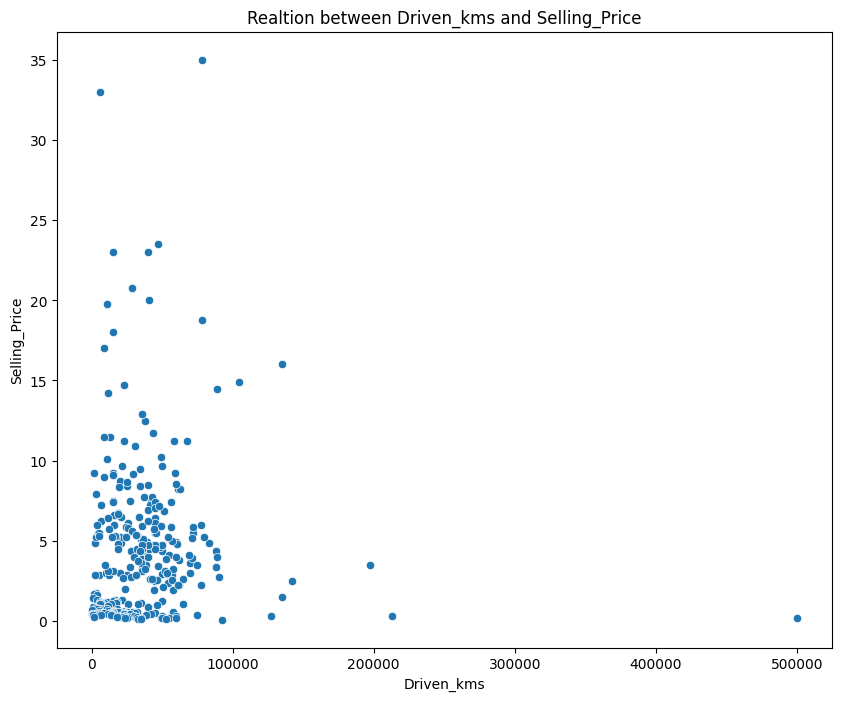

In [15]:
#with this plot we can easily get idea of selling price and driven kms relation
plt.figure(figsize=(10,8))
sns.scatterplot(x = 'Driven_kms',y = 'Selling_Price',data = car)
plt.title('Realtion between Driven_kms and Selling_Price')
plt.show()

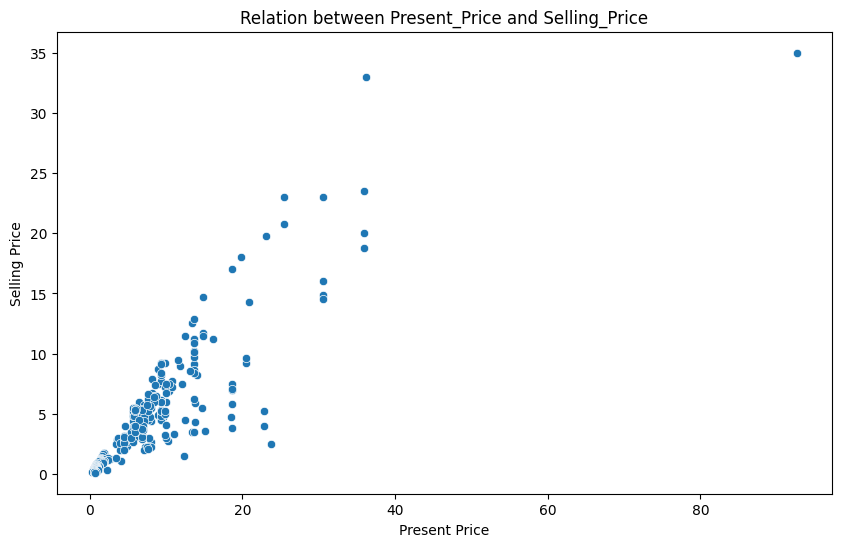

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot (x = 'Present_Price',y='Selling_Price',data = car )
plt.title('Relation between Present_Price and Selling_Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.show()


In [17]:
#Car sell each year
year_wise_selling = car.groupby('Year')['Car_Name'].value_counts().sort_values(ascending = False).reset_index()
year_wise_selling.head(10)

,Year,Car_Name,count
0,2015,city,8
1,2016,city,7
2,2015,grand i10,5
3,2012,verna,5
4,2016,jazz,5
5,2015,ciaz,5
6,2014,amaze,4
7,2015,brio,4
8,2013,verna,4
9,2013,corolla altis,4


In [18]:
car_count = car['Car_Name'].value_counts().reset_index()
car_count.head(10)

,Car_Name,count
0,city,26
1,corolla altis,16
2,verna,14
3,brio,10
4,fortuner,10
5,ciaz,9
6,innova,9
7,i20,9
8,grand i10,8
9,jazz,7


In [19]:
count_by_fuel_type = car.groupby('Fuel_Type')['Car_Name'].count().sort_values(ascending = False).reset_index()
count_by_fuel_type = count_by_fuel_type.rename(columns = {'Car_Name':'Count'})
count_by_fuel_type

,Fuel_Type,Count
0,Petrol,239
1,Diesel,58
2,CNG,2


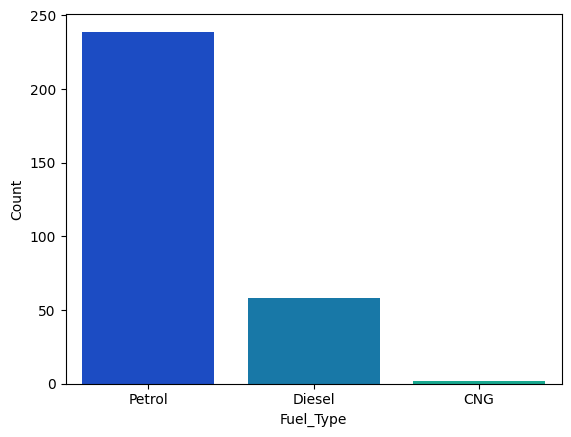

In [20]:
sns.barplot(data = count_by_fuel_type, x= 'Fuel_Type', y = 'Count',palette = 'winter')
plt.show()

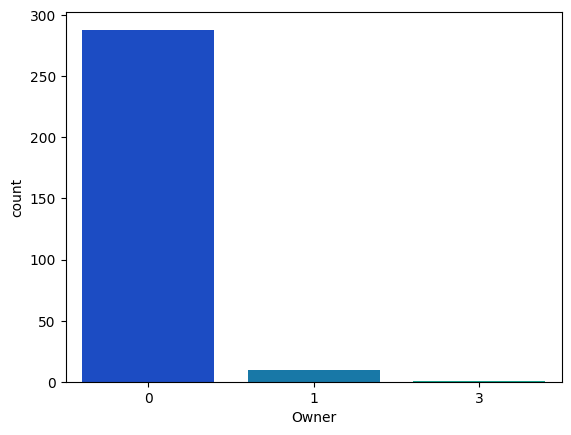

In [21]:
sns.countplot(data = car, x = 'Owner',palette = 'winter')
plt.show()

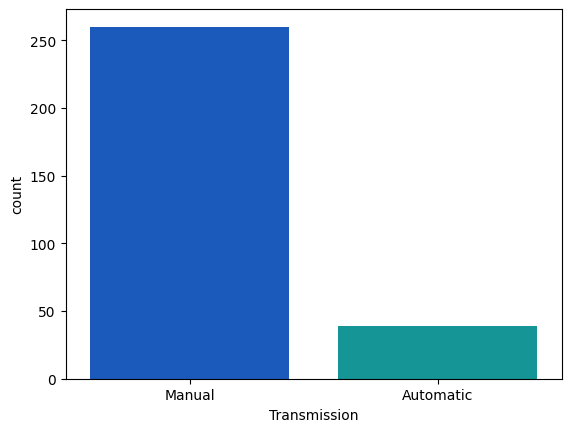

In [22]:
sns.countplot(data = car, x = car['Transmission'],palette = 'winter')
plt.show()

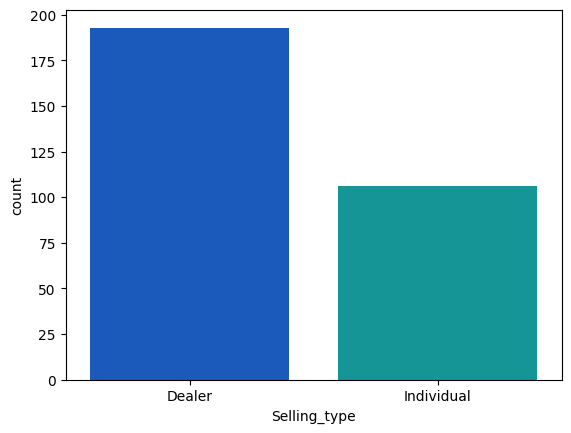

In [23]:
sns.countplot(data = car,x =car['Selling_type'],palette = 'winter')
plt.show()

In [24]:
car.groupby('Car_Name')['Fuel_Type'].value_counts().sort_index(ascending = False).reset_index()

,Car_Name,Fuel_Type,count
0,xcent,Petrol,3
1,wagon r,Petrol,3
2,wagon r,CNG,1
3,vitara brezza,Diesel,1
4,verna,Petrol,8
...,...,...,...
111,Bajaj Avenger 150,Petrol,1
112,Bajaj ct 100,Petrol,1
113,Activa 4g,Petrol,1
114,Activa 3g,Petrol,2


<Axes: xlabel='Present_Price', ylabel='Selling_Price'>

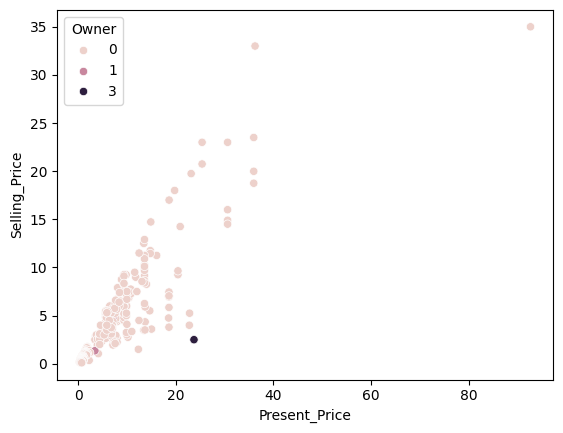

In [25]:
sns.scatterplot(data = car,x = car['Present_Price'],y =car['Selling_Price'],hue = car['Owner'])

In [26]:
# how to the index of this dark spot

car[car['Present_Price']> 80].index

Index([86], dtype='int64')

In [27]:
#lets drop this index
car = car.drop([86],axis = 0)

**Top 5 Car Model by Frequenc**y

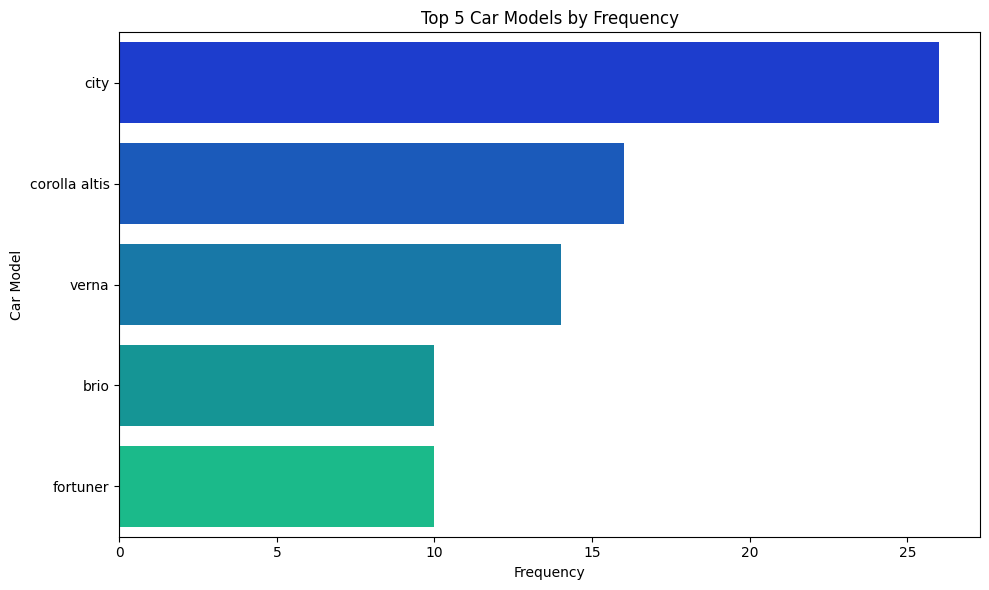

In [28]:
n = 5  # number of the top car models
top_car_models = car['Car_Name'].value_counts().head()

plt.figure(figsize =(10,6))
sns.barplot(x = top_car_models.values, y= top_car_models.index,palette = 'winter')
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

**Top 5 Models by Average Price**

In [29]:
# to calculate average price for each car model
avg_price_by_car = car.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending = False)

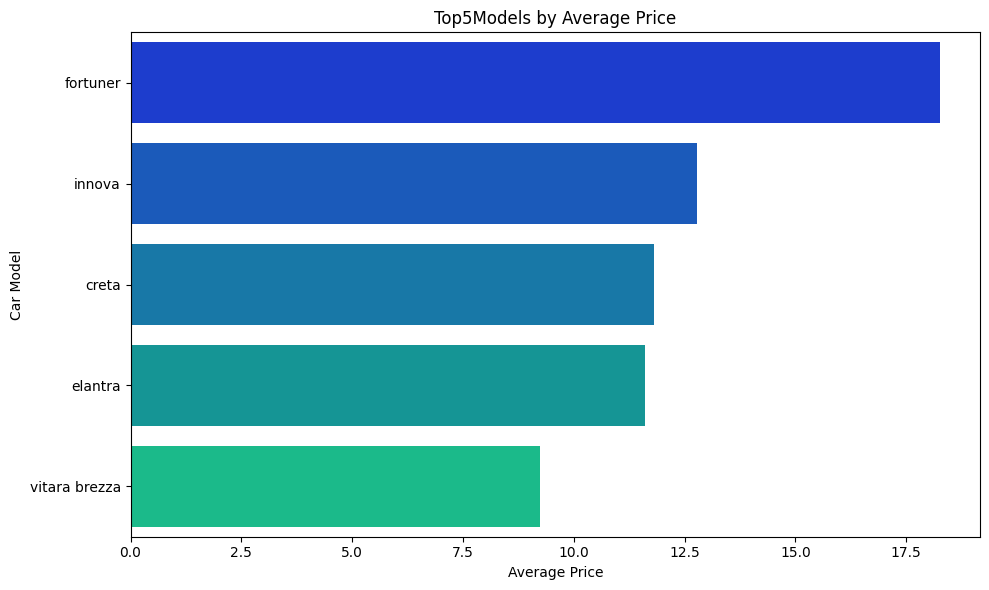

In [30]:
#Lets plot graph
n = 5
top_car_models = avg_price_by_car.head(n)

plt.figure(figsize=(10,6))
sns.barplot(x = top_car_models.values, y = top_car_models.index,palette = 'winter')
plt.title(f'Top{n}Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

In [31]:
print(car['Selling_type'].value_counts())

Selling_type
Dealer        192
Individual    106
Name: count, dtype: int64


In [32]:
print(car['Transmission'].value_counts())

Transmission
Manual       259
Automatic     39
Name: count, dtype: int64


In [33]:
print(car['Fuel_Type'].value_counts())

Fuel_Type
Petrol    239
Diesel     57
CNG         2
Name: count, dtype: int64


Encoding Categorical Value

In [34]:
#encoding Fuel_Type column
car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

In [35]:
#encoding seller_type column
car.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

In [36]:
#encoding Transmisiion column
car.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [37]:
#checking df after encoding
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [38]:
#Define Target variable

x =car.drop(['Car_Name','Selling_Price'],axis=1)
y = car['Selling_Price']



In [39]:
x

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [40]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 298, dtype: float64

**Train & Test Data**

In [41]:
#splitting the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state =42)

**Model-1 : LinearRegression**

In [42]:
#Train the model
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train,y_train)


LinearRegression()

In [43]:
y_pred_train = LR.predict(x_train)
y_pred_test = LR.predict(x_test)

In [44]:
#Evaluate the model
train_mse = mean_squared_error(y_train,y_pred_train)
test_mse = mean_squared_error(y_test,y_pred_test)
train_r2 = r2_score(y_train,y_pred_train)
test_r2 = r2_score(y_test,y_pred_test)

print (f"Training MSE:{train_mse}")
print(f"Testing_MSE:{test_mse}")
print(f"Training R2 Score:{train_r2}")
print(f"Testing R2 Score:{test_r2}")


Training MSE:2.003755134065602
Testing_MSE:6.802120783013264
Training R2 Score:0.8963489288992615
Testing R2 Score:0.7818647280618298


**Model-2 KNN**

In [45]:
#let us import KNN
from sklearn.neighbors import KNeighborsRegressor

In [46]:
mse_values = []
r2_values = []
max_neighbors = 10
for k in range(1,max_neighbors+1):
    knn =KNeighborsRegressor(n_neighbors = k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    mse_values.append(mse)
    r2_values.append(r2)

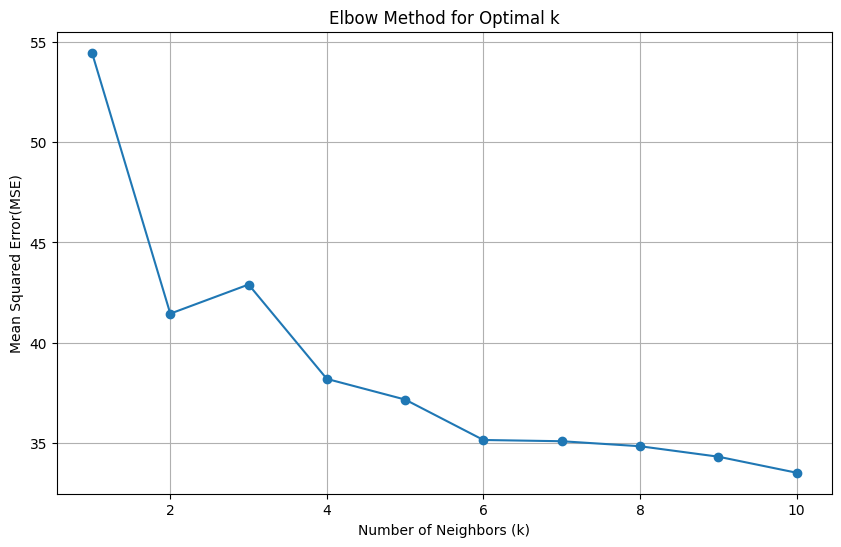

In [47]:
#now i need elbow plot
plt.figure(figsize=(10,6))
plt.plot(range(1,max_neighbors+1),mse_values,marker ='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error(MSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [48]:
# choose the optimal k based on the elbow curve
optimal_k = mse_values.index(min(mse_values))+1
print(f"Optimal number of Neighbors(k):{optimal_k}")

Optimal number of Neighbors(k):10


In [49]:
#train the KNN model with optimal k
knn = KNeighborsRegressor(n_neighbors=optimal_k)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=10)

In [50]:
#evaluate the model
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [51]:
train_mse = mean_squared_error(y_train,y_pred_train)
test_mse = mean_squared_error(y_test,y_pred_test)
train_r2 = r2_score(y_train,y_pred_train)
test_r2 = r2_score(y_test,y_pred_test)

#printing the resuls
print(f"Traiining MSE:{train_mse}")
print(f"Testing MSE : {test_mse}")
print(f"Training MSE:{train_r2}")
print(f"Testing R2 Score:{test_r2}")

Traiining MSE:15.875710155462182
Testing MSE : 33.51791926666667
Training MSE:0.17877472445460352
Testing R2 Score:-0.0748765961778588


**Model-3 DecisionTree**

In [53]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor,export_graphviz
#sklearn.metrics.get_scorer_names()

In [54]:
param_grid = {
    'max_depth' : [3,5,7,9],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

dt_regressor = DecisionTreeRegressor(random_state = 42)
grid_search = GridSearchCV(estimator = dt_regressor,param_grid = param_grid,cv = 5,scoring = 'neg_mean_squared_error',verbose = 1,n_jobs = -1)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [55]:
best_param = grid_search.best_params_
print ('Best Hyperparameters :',best_param)
best_dt_regressor = DecisionTreeRegressor(**best_param)
best_dt_regressor.fit(x_train,y_train)

Best Hyperparameters : {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}


DecisionTreeRegressor(max_depth=7, min_samples_split=5)

In [56]:
y_pred_train = best_dt_regressor.predict(x_train)
y_pred_test = best_dt_regressor.predict(x_test)

In [57]:
train_mse = mean_squared_error(y_train,y_pred_train)
test_mse = mean_squared_error(y_test,y_pred_test)
train_r2 = r2_score(y_train,y_pred_train)
test_r2 = r2_score(y_test,y_pred_test)

print (f"Training MSE:{train_mse}")
print(f"Testing MSE : {test_mse}")
print(f"Training R2 Score : {train_r2}")
print(f"Testing R2 Score : {test_r2}")

Training MSE:0.33835180073747073
Testing MSE : 4.307191220957205
Training R2 Score : 0.9824975986541107
Testing R2 Score : 0.8618739128214967


**Model-4 Random Forest**

In [58]:
#let us imprt forest
from sklearn.ensemble import RandomForestRegressor


In [59]:
param_grid = {
    'n_estimators':[100,200,300],
    'max_depth':[None,5,10],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}
rf_regressor = RandomForestRegressor(random_state = 42)
grid_search = GridSearchCV(estimator = rf_regressor,param_grid = param_grid, cv =5,scoring = 'neg_mean_squared_error',verbose = 1,n_jobs = -1)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [61]:
best_param = grid_search.best_params_
print ('Best Hyperparameters:',best_param)
best_rf_regressor = RandomForestRegressor(**best_param)
best_rf_regressor.fit(x_train,y_train)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


RandomForestRegressor(max_depth=10, n_estimators=300)

In [63]:
#print the result
y_pred_train = best_rf_regressor.predict(x_train)
y_pred_test = best_rf_regressor.predict(x_test)
train_mse = mean_squared_error(y_train,y_pred_train)
test_mse = mean_squared_error(y_test,y_pred_test)
train_r2 = r2_score(y_train,y_pred_train)
test_r2 = r2_score(y_test,y_pred_test)

print(f"Training MSE:{train_mse}")
print(f"Testing MSE:{test_mse}")
print(f"Training R2 Score:{train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE:0.14648821043665644
Testing MSE:4.176131192309742
Training R2 Score:0.9924223974989488
Testing R2 Score: 0.8660768395117479


**Model-5 XGBRegressor**

In [64]:
from xgboost import XGBRegressor

In [66]:
param_grid = {
    'n_estimators':[100,200,300],
    'max_depth':[3,5,7],
    'Learning_rate':[0.1, 0.01, 0.001]
}
xgb_regressor = XGBRegressor(random_state = 42)
grid_search = GridSearchCV(estimator = xgb_regressor,param_grid = param_grid,cv=5,scoring = 'neg_mean_squared_error',verbose = 1,n_jobs = -1)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'Learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [67]:
best_param = grid_search.best_params_
print('Best Hyperparameters :',best_param)
best_xgb_regressor = XGBRegressor(** best_param,random_state = 42)
best_xgb_regressor.fit(x_train,y_train)

Best Hyperparameters : {'Learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


XGBRegressor(Learning_rate=0.1, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, ...)

In [68]:
y_pred_train = best_xgb_regressor.predict(x_train)
y_pred_test = best_xgb_regressor.predict(x_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 8.000548028689382e-06
Testing MSE: 3.283140734872487
Training R2 Score: 0.9999995861443555
Testing R2 Score: 0.8947138958777149


**Model Comparison**

In [69]:
models = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(random_state = 42),
    'Random Forest' : RandomForestRegressor(random_state = 42),
    'XGBoost':XGBRegressor(random_state = 42)
}

In [70]:
results = []
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    results.append({'Model': name,
                    'Training MSE': train_mse,
                    'Testing MSE': test_mse,
                    'Training R2 Score': train_r2,
                    'Testing R2 Score': test_r2})
results_df = pd.DataFrame(results)
results_df

,Model,Training MSE,Testing MSE,Training R2 Score,Testing R2 Score
0,Linear Regression,2.003755e+00,6.802121,0.896349,0.781865
1,Decision Tree,9.710571e-36,4.201368,1.000000,0.865268
2,Random Forest,1.344117e-01,4.318491,0.993047,0.861512
3,XGBoost,6.741220e-05,3.400494,0.999997,0.890951


**Conclusion:** Decisiontree and Random forest model perform exceptionally well.